<a href="https://colab.research.google.com/github/Vanessavill/Vanessavill.github.io/blob/PROYECTOS-MACHINE-LEARNING/Proyecto_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$Proyecto \ 8$

##$Julian \ David \ Beltrán \ Mondragón \ , \ Lizeth \ Daniela \ Villamil \ Gil \ , \ Vanessa \ Alexandra \ Villarreal \ Castro$


In [189]:
import numpy as np 
import pandas as pd 

from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly

In [190]:
df = pd.read_csv('/content/economicas.csv')

In [191]:
df

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [192]:
df = df[['RESULT_PUNTAJE'	,'PUNT_GLOBAL', 'RESULT_DESEMPENO', 'PERCENTIL_GLOBAL']]

In [193]:
df

,RESULT_PUNTAJE,PUNT_GLOBAL,RESULT_DESEMPENO,PERCENTIL_GLOBAL
0,128,201,2,99
1,209,222,4,100
2,106,88,1,2
3,89,159,1,71
4,122,156,1,67
...,...,...,...,...
3850,151,196,2,98
3851,162,192,3,97
3852,0,158,1,70
3853,110,117,1,15


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESULT_PUNTAJE    3855 non-null   int64
 1   PUNT_GLOBAL       3855 non-null   int64
 2   RESULT_DESEMPENO  3855 non-null   int64
 3   PERCENTIL_GLOBAL  3855 non-null   int64
dtypes: int64(4)
memory usage: 120.6 KB


In [195]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

RESULT_PUNTAJE      True
PUNT_GLOBAL         True
RESULT_DESEMPENO    True
PERCENTIL_GLOBAL    True
dtype: bool

In [196]:
df.head()

,RESULT_PUNTAJE,PUNT_GLOBAL,RESULT_DESEMPENO,PERCENTIL_GLOBAL
0,128,201,2,99
1,209,222,4,100
2,106,88,1,2
3,89,159,1,71
4,122,156,1,67


In [197]:
df.tail()

,RESULT_PUNTAJE,PUNT_GLOBAL,RESULT_DESEMPENO,PERCENTIL_GLOBAL
3850,151,196,2,98
3851,162,192,3,97
3852,0,158,1,70
3853,110,117,1,15
3854,115,147,1,54


In [198]:
df.shape

(3855, 4)

In [199]:
df.isnull().sum()

RESULT_PUNTAJE      0
PUNT_GLOBAL         0
RESULT_DESEMPENO    0
PERCENTIL_GLOBAL    0
dtype: int64

In [200]:
df.dtypes

RESULT_PUNTAJE      int64
PUNT_GLOBAL         int64
RESULT_DESEMPENO    int64
PERCENTIL_GLOBAL    int64
dtype: object

In [201]:
indices = [26, 176, 392]
muestras = pd.DataFrame(df.loc[indices], 
                       columns = df.keys()).reset_index(drop = True)
data = df.drop(indices, axis = 0)
data

,RESULT_PUNTAJE,PUNT_GLOBAL,RESULT_DESEMPENO,PERCENTIL_GLOBAL
0,128,201,2,99
1,209,222,4,100
2,106,88,1,2
3,89,159,1,71
4,122,156,1,67
...,...,...,...,...
3850,151,196,2,98
3851,162,192,3,97
3852,0,158,1,70
3853,110,117,1,15


In [202]:
data = data.drop(['RESULT_DESEMPENO', 'PERCENTIL_GLOBAL'], axis = 1)
muestras = muestras.drop(['RESULT_DESEMPENO', 'PERCENTIL_GLOBAL'], axis = 1)

In [203]:
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [204]:
from sklearn.cluster import KMeans
X = data_escalada.copy() 

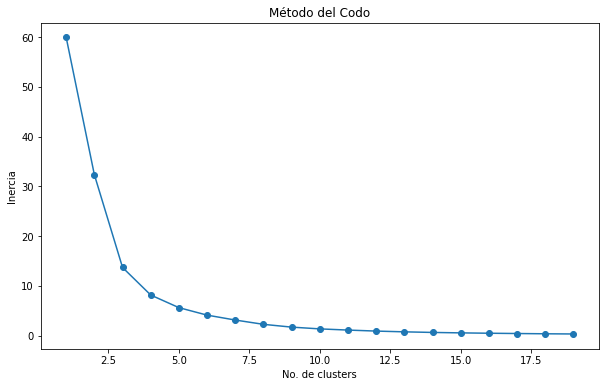

In [205]:
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

In [206]:
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [207]:
algoritmo.fit(X)

KMeans(n_clusters=6)

In [208]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_
muestra_prediccion = algoritmo.predict(muestras_escalada)
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 3
Muestra 2 se encuentra en el clúster: 5


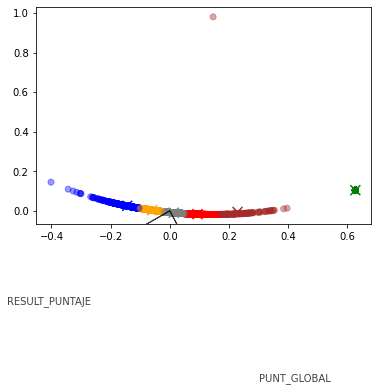

In [209]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos

from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

In [210]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)

0.6619715465007465

NameError: ignored

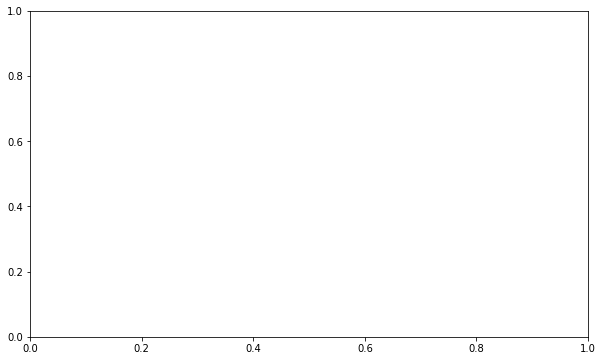

In [212]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
markers = ['s','>','o']
for i,j in zip(np.unique(y), markers):
  ax.scatter(data_escalada.iloc[:,2][muestras_escalada==i], data_escalada.iloc[:,3][muestras_escalada==i], marker=j)

ax.set_xlabel(data_escalada.columns[2], size=14)
ax.set_ylabel(muestras_escalada.columns[3], size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score 
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels) 0.6619...